<a href="https://colab.research.google.com/github/Henry-Le-CS/Basic-Machine-Learning/blob/master/Customer_segment_using_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this project, we will implement K-means with customer segment data using scikitlearn

# K-means implementation

**Packages**

We will use:

- Numpy
- Matplotlib
- Panda
- Scikitlearn
- Seaborn
- Plotly

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

**Data exploration**

This input file contains the basic information (ID, age, gender, income, spending score) about the customers of a mall. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

The data source can be found on https://www.kaggle.com/code/heeraldedhia/kmeans-clustering-for-customer-data/data

In [4]:
cus = pd.read_csv('segmented_customers.csv')

In [5]:
cus.columns = ['ID', 'Gender','Age','Income','Spending','cluster']
cus.head(5)

,ID,Gender,Age,Income,Spending,cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


We will exclude the CustomerID, cluster as they are unnecessary for now

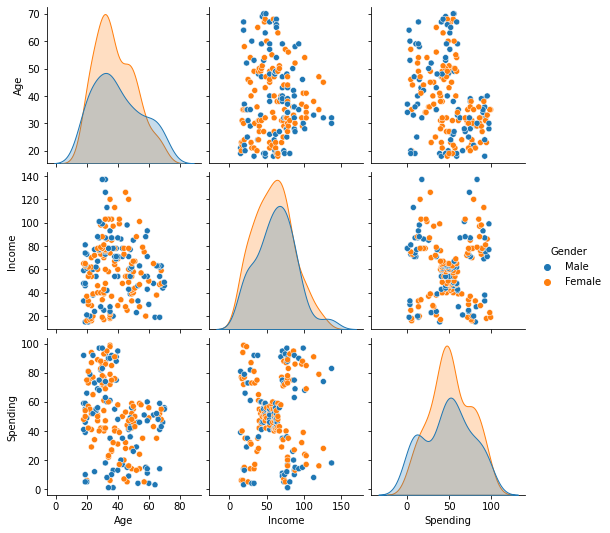

In [6]:
sns.pairplot(cus, vars = ['Age','Income','Spending'], hue = 'Gender')

We can see there are minor differences between the two genders. Therefore, from the original dataset, we will exclude ID, gender, cluster feature

In [7]:
cus = cus[['Age','Income','Spending']]

In [8]:
cus.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


**2D clustering between Spending and Age**

Text(0, 0.5, 'Spending')

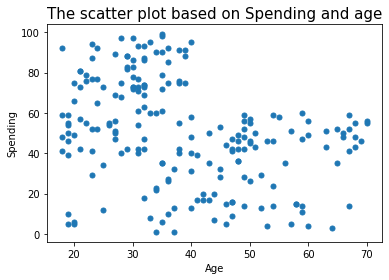

In [9]:
plt.title('The scatter plot based on Spending and age',fontsize = 15)
plt.scatter(x = 'Age', y = 'Spending', data=cus,s=25)
plt.xlabel('Age')
plt.ylabel('Spending')

Next, we will decide the number of K clusterings based on the elbow method

In [10]:
X = cus[['Age','Spending']].iloc[:,:].values

In [11]:
def elbow(X):
  J = []
  for i in range(1,10):
    model = KMeans(n_clusters=i,n_init = 10, max_iter = 300, tol = 0.0001)
    model.fit(X)
    J.append(model.inertia_)
  return J

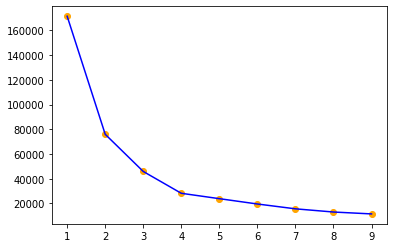

In [12]:
J_elbow = elbow(X)
plt.plot(np.arange(1,10),J_elbow,'o',c='orange')
plt.plot(np.arange(1,10),J_elbow,'-',c='blue')

We will use k = 4

In [13]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
model = KMeans(n_clusters=4, n_init = 15,tol = 0.0001)
model.fit(X)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
centroids = model.cluster_centers_
labels = model.labels_

Now we visualize the data

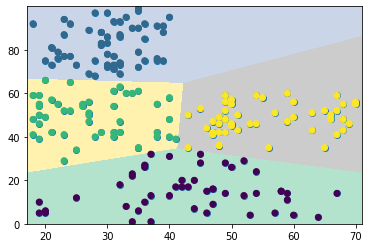

In [14]:
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()),origin='lower',cmap = plt.cm.Pastel2, aspect = 'auto')
plt.scatter(x='Age', y = 'Spending', data = cus)
plt.scatter(x='Age',y='Spending',data = cus, c=labels)

**2D clustering between Spending and Age**

In [15]:
X = cus[['Age','Spending']]
X.head()

,Age,Spending
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


Similarly, we will plot the scatter plot and implement KMeans

Text(0, 0.5, 'Income')

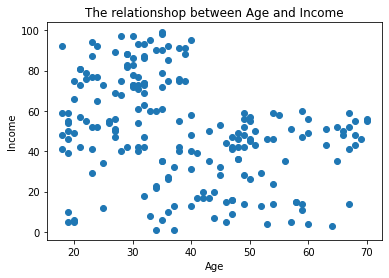

In [16]:
plt.scatter(x = 'Age', y = 'Spending', data = cus)
plt.title('The relationshop between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')

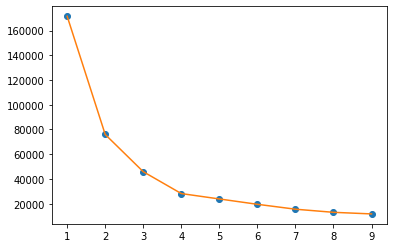

In [17]:
J_hist = elbow(X)
plt.plot(np.arange(1,10),J_hist,'o')
plt.plot(np.arange(1,10),J_hist,'-')

In [18]:
h = 0.02
X = X.values
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
model = KMeans(n_clusters=3, n_init = 15,tol = 0.0001)
model.fit(X)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
centroids = model.cluster_centers_
labels = model.labels_

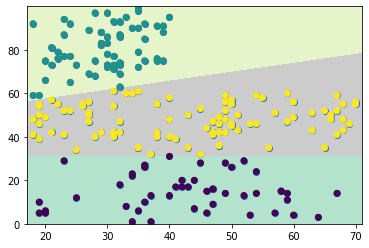

In [19]:
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()),origin='lower',cmap = plt.cm.Pastel2, aspect = 'auto')
plt.scatter(x='Age', y = 'Spending', data = cus)
plt.scatter(x='Age',y='Spending',data = cus, c=labels)

**2D clustering between Spending and Age**

In [20]:
X = cus[['Income','Spending']]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0, 0.5, 'Spending')

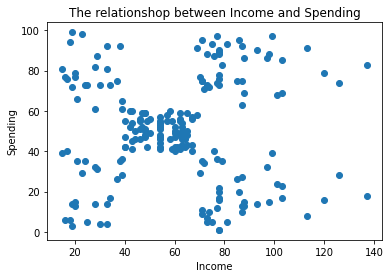

In [21]:
plt.scatter(x = 'Income', y = 'Spending', data = cus)
plt.title('The relationshop between Income and Spending')
plt.xlabel('Income')
plt.ylabel('Spending')

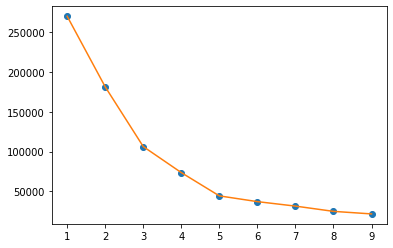

In [22]:
J_hist = elbow(X)
plt.plot(np.arange(1,10),J_hist,'o')
plt.plot(np.arange(1,10),J_hist,'-')

In [23]:
h = 0.02
X = X.values
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
model = KMeans(n_clusters=5, n_init = 15,tol = 0.0001)
model.fit(X)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
centroids = model.cluster_centers_
labels = model.labels_

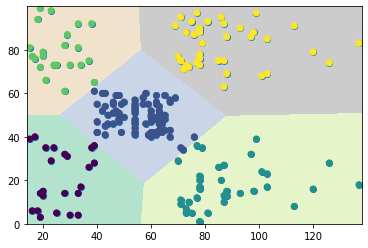

In [24]:
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()),origin='lower',cmap = plt.cm.Pastel2, aspect = 'auto')
plt.scatter(x='Income', y = 'Spending', data = cus)
plt.scatter(x='Income',y='Spending',data = cus, c=labels)

**3D clustering for Age, Income, Spending**

In [25]:
X = cus.values
print('The first five element: ',X[:5])

The first five element:  [[19 15 39]
 [21 15 81]
 [20 16  6]
 [23 16 77]
 [31 17 40]]


Choosing K

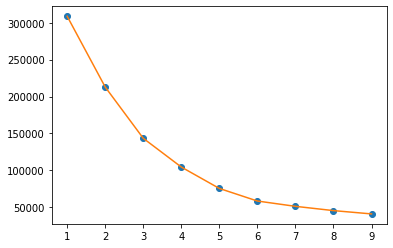

In [26]:
J_hist = elbow(X)
plt.plot(np.arange(1,10),J_hist, 'o')
plt.plot(np.arange(1,10),J_hist,'-')

In [27]:
#We choose k = 5, 6 to test

In [28]:
model1 = KMeans(n_clusters=5, n_init = 20)
model1.fit(X)
labels = model1.labels_
centroids = model1.cluster_centers_

The hard part for me now is implementing the drawing functions

In [29]:
cus['cluster'] = pd.DataFrame(model1.fit_predict(X))

<ipython-input-29-95f416215b02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus['cluster'] = pd.DataFrame(model1.fit_predict(X))


In [30]:
cus.head()

,Age,Income,Spending,cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


In [32]:
import plotly as py
import plotly.graph_objs as go

Scatter = go.Scatter3d(
    x = cus['Age'],
    y = cus['Income'],
    z = cus['Spending'],
    mode = 'markers',
    marker = dict(
        color = cus['cluster'],
        line=dict(
            color= cus['cluster'],
            width= 12
        ),
        opacity=0.8
    )
)
data = [Scatter]

layout = go.Layout(
    title = 'Clustering between age, spending and income',
    scene = dict(
        xaxis = dict(title = 'Age'),
        yaxis = dict(title = 'Income'),
        zaxis = dict(title = 'Spending')
    )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [46]:
model2 = KMeans(n_clusters=6, n_init = 20)
model2.fit(X)
labels = model2.labels_
centroids = model2.cluster_centers_

In [47]:
cus['cluster'] = pd.DataFrame(model2.fit_predict(X))

<ipython-input-47-a8499fa72484>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
cus.head()

,Age,Income,Spending,cluster
0,19,15,39,5
1,21,15,81,0
2,20,16,6,5
3,23,16,77,0
4,31,17,40,5


In [49]:
import plotly as py
import plotly.graph_objs as go

Scatter = go.Scatter3d(
    x = cus['Age'],
    y = cus['Income'],
    z = cus['Spending'],
    mode = 'markers',
    marker = dict(
        color = cus['cluster'],
        line=dict(
            color= cus['cluster'],
            width= 12
        ),
        opacity=0.8
    )
)
data = [Scatter]

layout = go.Layout(
    title = 'Clustering between age, spending and income',
    scene = dict(
        xaxis = dict(title = 'Age'),
        yaxis = dict(title = 'Income'),
        zaxis = dict(title = 'Spending')
    )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# Conclusion

Through this project, I got a handful knowledge of KMeans clustering. Moreover, I got used to new module such as plotly and seaborn.